<a href="https://colab.research.google.com/github/yasminbottan/regressao/blob/main/Conceito_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSÃO LINEAR**

## **O que é?**

 É uma técnica estatística usada para entender a relação entre variáveis numéricas. Tem como objetivo prever o valor de uma variável resposta  considerando as outras variáveis disponíveis na base de dados.

# **Exemplo: Marcas de Chocolate**

Temos uma base com as vendas e gastos com publicidade das principais marcas de chocolate do Brasil.


In [ ]:
import pandas as pd

df_marcas = pd.DataFrame(
    {
        'marca': ['Kopenhagem','Lindit','Cacau Show','Milka','Nestle','Lacta','Garoto'],
        'gasto_publicidade': [131.3,92.4,60.4,55.7,40.2,29.0,11.6],
        'vendas': [1929.2,1384.6,811.4,541.5,536.9,535.6,219.5]
    }
)

df_marcas

,marca,gasto_publicidade,vendas
0,Kopenhagem,131.3,1929.2
1,Lindit,92.4,1384.6
2,Cacau Show,60.4,811.4
3,Milka,55.7,541.5
4,Nestle,40.2,536.9
5,Lacta,29.0,535.6
6,Garoto,11.6,219.5


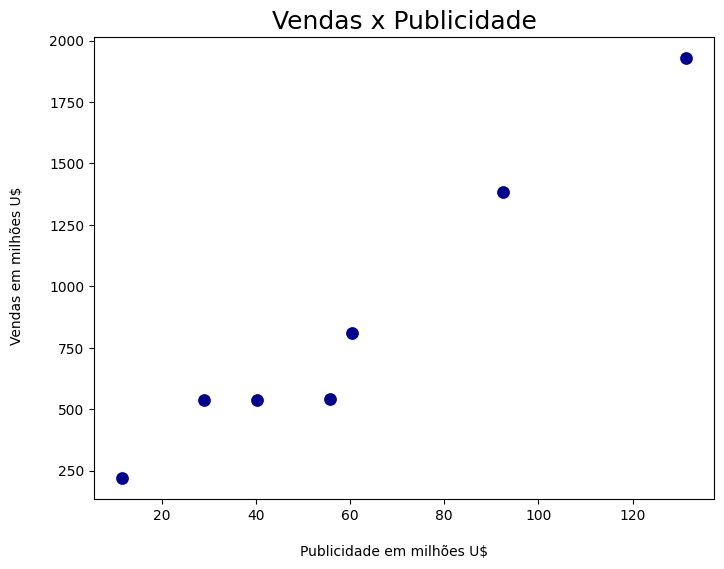

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(8,6))
sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, color='DarkBlue', s=100);

axes.set_title('Vendas x Publicidade', fontsize=18)
axes.set_xlabel('')
axes.set_ylabel('')

fig.supxlabel('Publicidade em milhões U$', fontsize=10)
fig.supylabel('Vendas em milhões U$', fontsize=10);

No gráfico, é possível observar a relação entre vendas e o gasto com publicidade de cada marca de chocolate. A regressão linear identifica a linha reta que melhor se ajusta aos pontos, minimizando a distância entre a linha e os pontos de dados (o erro).

* Linha: previsão (linha de regressão, que representa a relação entre as variáveis).
* Distância: erro (a distância entre a linha de regressão e os pontos de dados).

# **Modelo de Regressão Linear Simples**

Para encontrarmos a nossa **Regressão Linear** será necessário:



1.   Escolher x (variável independente) e y (variável resposta)
2.   Identificar o Intercepto
3.   Identificar o Coeficiente
4.   Identificar a predição de y (y_pred)





In [ ]:
# 1.   Escolher x (variável independente) e y (variável resposta)

X = df_marcas.filter(['gasto_publicidade']).copy()
y = df_marcas['vendas'].copy()

Aqui, X é a variável independente (gasto com publicidade), e y é a variável dependente (vendas). O modelo tentará prever y com base em X.

In [ ]:
# 2.   Identificar o Intercepto

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

lr.intercept_

-15.420436321709303

O intercepto é o valor de y quando x = 0. Ou seja, a previsão de vendas quando não há nenhum gasto com publicidade será de U$ 15,42.

In [ ]:
# 3.   Identificar o Coeficiente

lr.coef_

array([14.42378282])

O coeficiente indica quanto a variável y (vendas) muda quando há um aumento unitário em x (gasto com publicidade).
Ou seja, a cada US 1 gasto com publicidade, aumentará em U$ 14,42 as vendas.

In [ ]:
# 4.   Identificar a predição de y (y_pred)

y_pred = lr.predict(X)
y_pred

array([1878.42224799, 1317.33709628,  855.77604603,  787.98426677,
        564.41563306,  402.86926547,  151.89544439])

y_pred são os valores preditos de y (vendas) com base no modelo de regressão linear. O modelo gera uma previsão de vendas para cada valor de gasto com publicidade.

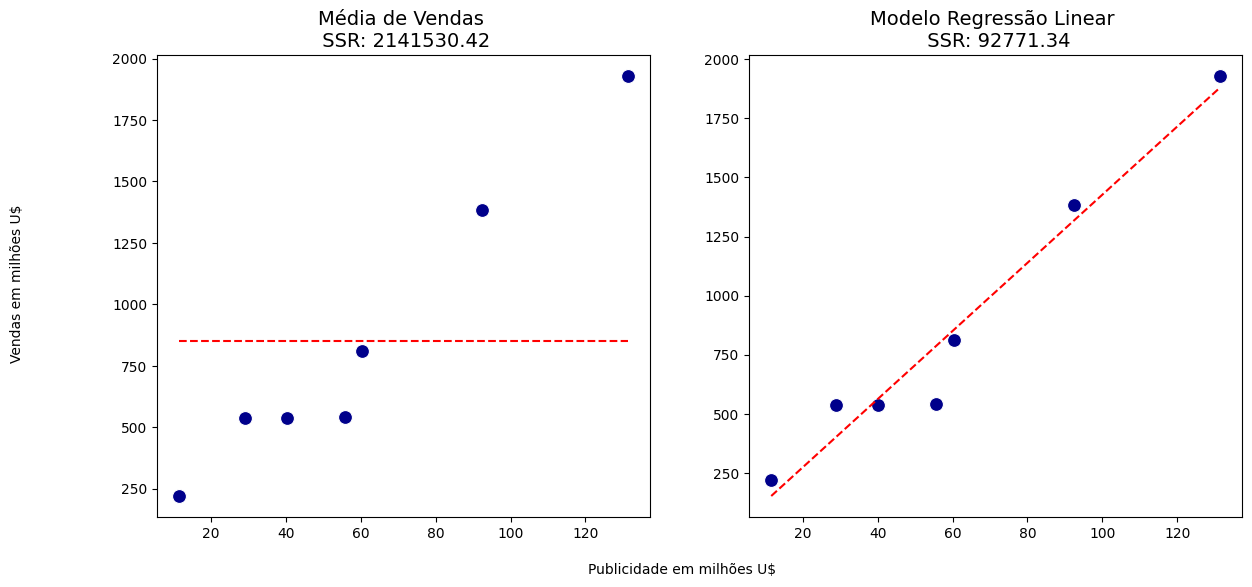

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(14, 6))

sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[0], color='DarkBlue', s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas.mean(), ax=axes[0], linestyle='--', color='red')

ssr_avg = sum((df_marcas.vendas.mean() - y) ** 2)
axes[0].set_title(f'Média de Vendas \n SSR: {ssr_avg:.2f}', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('')


sns.scatterplot(x=df_marcas.gasto_publicidade, y=df_marcas.vendas, ax=axes[1], color='DarkBlue', s=100);
sns.lineplot(x=df_marcas.gasto_publicidade, y=y_pred, ax=axes[1], linestyle='--', color='red')

ssr_model = sum((y - y_pred) ** 2)
axes[1].set_title(f'Modelo Regressão Linear \n SSR: {ssr_model:.2f}', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('')


fig.supxlabel('Publicidade em milhões U$', fontsize=10)
fig.supylabel('Vendas em milhões U$', fontsize=10);

O gráfico (1) mostra a relação entre gasto com publicidade e vendas de cada marca com o destaque da linha em vermelho indicando a média das vendas sem considerar a previsão. O SSR de 2.141.530,42 mostra a distorção entre o modelo de média e os dados reais.

O gráfico (2) novamente mostra a relação entre gasto com publicidade e vendas mas dessa vez o destaque da linha em vermelho apresenta modelo ajustado de vendas, com base na regressão linear. A redução desse erro SSR para 92.771,34 indica que o modelo de regressão é mais preciso do que o modelo baseado na média.

**CONCEITO IMPORTANTE**

SSR ou Sum of Square Residuals também conhecido como Soma dos Quadrados dos Resíduos, é uma medida estatística que quantifica o erro de um modelo de regressão.

Em termos simples, o SSR mede o quão bem o modelo se ajusta aos dados, indicando a quantidade de erro que o modelo comete. Portanto, quanto menor, mais bem ajustado será o modelo de Regressão Linear.

# **Aplicando Modelo**

Para aplicarmos o Modelo de Regressão Linear Simples contruído anteriormente precisamos:

1.  Criar novo banco de dados
2.  Predição de vendas utilizando modelo
3.  Criar função de previsão
4.  Chamar função para prever as vendas
5.  Cálculo do Coeficiente (R2)

In [ ]:
# 1.  Criar novo banco de dados

df_marcas_prod = pd.DataFrame(
    {
        'marca': ['Cacau Show SP', 'Cacau Show RJ'],
        'gasto_publicidade': [20, 30],
    }
)

df_marcas_prod

,marca,gasto_publicidade
0,Cacau Show SP,20
1,Cacau Show RJ,30


Com esses dados podemos fazer previsões de vendas com base nos valores de gasto com publicidade.

In [ ]:
# 2.  Predição de vendas utilizando modelo

print(lr.predict(df_marcas_prod[['gasto_publicidade']]))

[273.05522009 417.29304829]


O predict recebe como entrada o banco de dados criado com a coluna 'gasto_publicidade' e retorna as vendas preditas para esses valores de publicidade.

In [ ]:
# 3.  Criar função de previsão

def func_total_vendas(b0, b1, x1):
    return round(b0 + (b1 * x1), 4)

Esta função recebe três parâmetros:

* b0 (intercepto da regressão linear)
* b1 (coeficiente da regressão linear, relacionado ao impacto do gasto com publicidade nas vendas)
* x1 (valor de gasto com publicidade para o qual queremos prever as vendas).

A função calcula a previsão de vendas usando a fórmula da equação da reta da regressão linear:

𝑦
=
𝑏
0
+
(
𝑏
1
×
𝑥
1
)

In [ ]:
# 4.  Chamar função para prever as vendas

func_total_vendas(
    b0=lr.intercept_,
    b1=lr.coef_[0],
    x1=20
)

273.0552

A função func_total_vendas é chamada passando o intercepto (lr.intercept_), o coeficiente (lr.coef_[0]), e o valor de gasto com publicidade (x1=20 milhões de dólares) para a marca Guarana Light. Isso retorna a previsão de vendas para esse valor de gasto com publicidade.

In [ ]:
# 5.  Cálculo do Coeficiente (R2)

from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.9566798871073536

y representa os valores reais de vendas e y_pred são as previsões feitas pelo modelo de regressão linear. A função r2_score compara os dois e calcula o valor de R², que indica a qualidade do modelo de regressão é de 0,9567, ou seja é excelente.

**CONCEITO IMPORTANTE**

O r2_score é uma métrica que calcula o coeficiente de determinação (R²). Essa métrica mostra o quão bem o modelo de regressão linear se ajusta aos dados. O valor de R² varia entre 0 e 1:

* 0 significa que o modelo não explica nenhuma variabilidade dos dados.
* 1 significa que o modelo explica toda a variabilidade dos dados.